In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

In [8]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.figsize'] = (4.5, 3)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [3]:
df = pd.read_csv("../data/coins100-250nodates.csv")

In [5]:
df.head(10)

,Victory,Pax,Mars,Jupiter,Securitas,Liberalitas,Salus,Pietas,Pudicitia,Concordia
0,0.033193,0.034091,0.026578,0.094488,-0.015873,-0.015873,0.305263,-0.015873,-0.062500,0.048544
1,-0.015837,0.069597,0.122977,-0.021583,0.225806,0.225806,-0.024194,0.467742,0.000000,-0.023148
2,-0.004138,-0.017123,0.025937,0.091912,-0.026316,-0.026316,-0.016529,-0.021978,0.000000,-0.014218
3,0.000462,-0.012776,0.033708,0.000000,-0.040541,-0.040541,-0.050420,0.269663,0.866667,-0.048077
4,-0.039225,-0.048235,0.046196,0.026936,-0.070423,-0.070423,-0.061947,-0.061947,-0.035714,-0.060606
5,-0.000961,-0.025958,0.007792,0.059016,-0.015152,-0.015152,0.216981,-0.028302,-0.037037,-0.026882
6,-0.016346,-0.003807,0.028351,-0.003096,-0.015385,-0.015385,0.100775,0.126214,0.000000,-0.005525
7,-0.162757,-0.025478,-0.157895,-0.208075,-0.203125,-0.515625,0.866197,1.284483,-0.230769,2.511111
8,0.023351,0.026144,0.056548,0.054902,0.058824,0.032258,-0.067925,0.056604,0.100000,0.055380
9,-0.063320,-0.080255,-0.056338,0.048327,0.351852,0.312500,0.141700,-0.028571,-0.045455,-0.011994


In [20]:
corr = df.corr(method = 'spearman').round(2)
corr

,Victory,Pax,Mars,Jupiter,Securitas,Liberalitas,Salus,Pietas,Pudicitia,Concordia
Victory,1.00,0.20,0.29,0.24,-0.00,0.03,-0.07,-0.16,0.03,-0.11
Pax,0.20,1.00,0.22,0.12,-0.01,-0.01,0.05,-0.04,-0.06,0.08
Mars,0.29,0.22,1.00,0.05,-0.05,-0.01,0.02,-0.07,-0.01,-0.05
Jupiter,0.24,0.12,0.05,1.00,0.20,0.17,0.18,-0.30,-0.02,-0.16
Securitas,-0.00,-0.01,-0.05,0.20,1.00,0.07,-0.09,0.03,-0.01,-0.20
Liberalitas,0.03,-0.01,-0.01,0.17,0.07,1.00,0.03,0.00,0.04,0.01
Salus,-0.07,0.05,0.02,0.18,-0.09,0.03,1.00,0.10,0.03,0.25
Pietas,-0.16,-0.04,-0.07,-0.30,0.03,0.00,0.10,1.00,0.08,0.17
Pudicitia,0.03,-0.06,-0.01,-0.02,-0.01,0.04,0.03,0.08,1.00,-0.04
Concordia,-0.11,0.08,-0.05,-0.16,-0.20,0.01,0.25,0.17,-0.04,1.00


In [27]:
corr_mask = stats.spearmanr(df)[1] >= 0.05
corr_mask

array([[False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True, False, False, False, False, False,  True,
        False],
       [ True,  True,  True, False, False,  True,  True,  True,  True,
        False],
       [ True,  True,  True, False,  True, False,  True,  True,  True,
         True],
       [ True,  True,  True, False,  True,  True, False,  True,  True,
        False],
       [ True,  True,  True, False,  True,  True,  True, False,  True,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True],
       [ True,  True,  True, False, False,  True, False, False,  True,
        False]])

<AxesSubplot:>

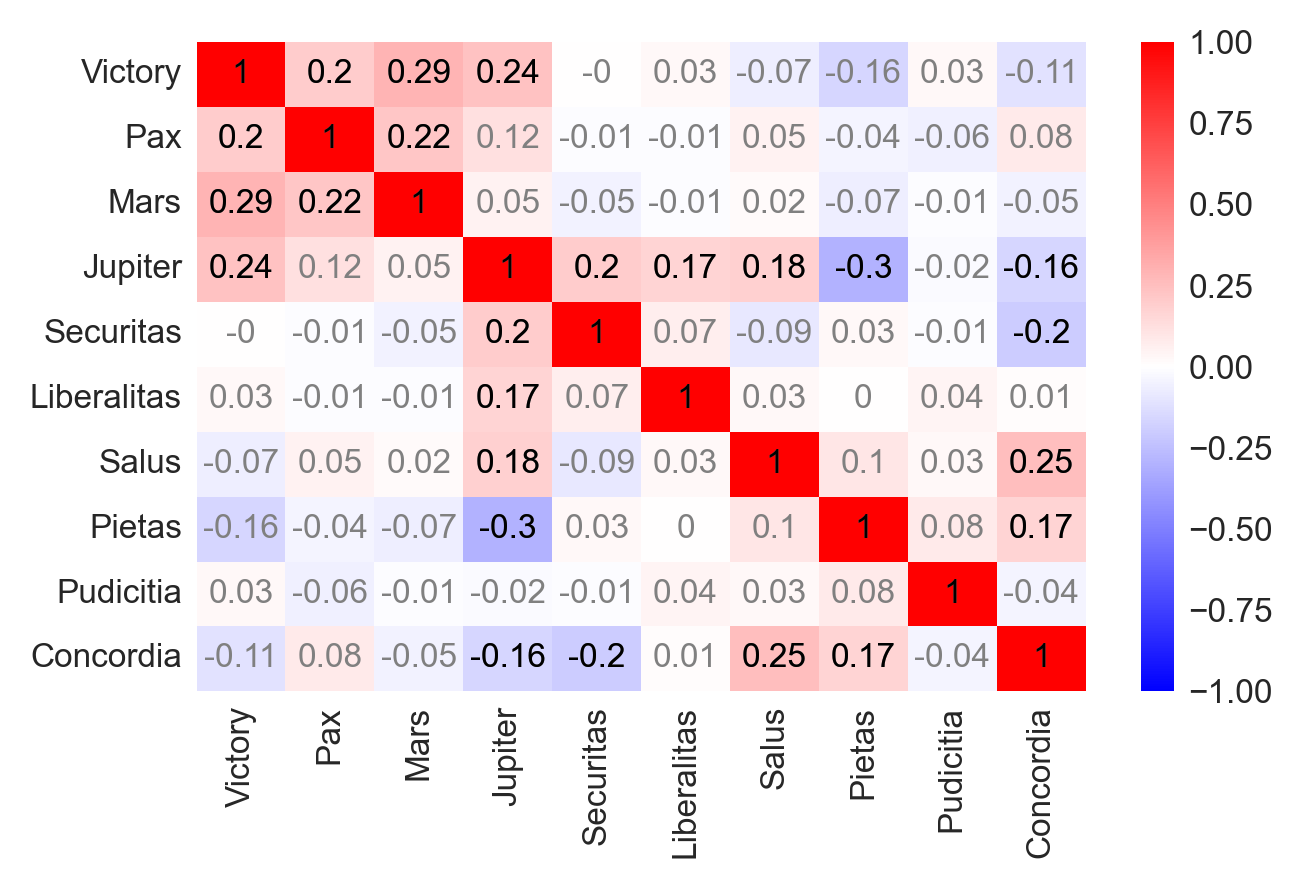

In [34]:
fig, ax = plt.subplots(tight_layout=True)
corr = df.corr(method = 'spearman').round(2)
sns.heatmap(corr,
            vmin=-1,
            annot=True,
            vmax=1,
            cmap= "bwr",
            cbar=False,
            annot_kws={"color":"grey"},
            ax=ax)
sns.heatmap(corr,
            annot=True,
            vmin=-1,
            vmax=1,
            cmap= "bwr",
            annot_kws={"color":"black"},
            mask=corr_mask,
            ax=ax)

In [36]:
save_figure(fig, "corr.png")